# Presentation
## Môn Học: Nhập Môn Lập Trình Python Cho Phân Tích

##                                                 GV: Quách Đình Hoàng


## Thành viên:

### 1. Đào Thị Cẩm Tiên - 19133055

### 2. Nguyễn Anh Đắc - 19133020

### 3. Nguyễn Thanh Tân Kỷ - 19133031



## Đề tài: Life Expectancy (WHO)

## Question:

### -  Tỷ lệ tử vong của Trẻ sơ sinh và Người lớn ảnh hưởng đến tuổi thọ như thế nào?

### - Một quốc gia có giá trị tuổi thọ thấp hơn (<65) có nên tăng chi tiêu cho chăm sóc sức khỏe để cải thiện tuổi thọ trung bình của mình không?

### - Các quốc gia đông dân có xu hướng có tuổi thọ thấp hơn không?

### - Chúng ta có nên tăng chỉ số phát triển con người ở các nước đã và đang phát triển để cải thiện tuổi thọ trung bình hay không?

### - So sánh các ca bệnh sởi giữa các nước đang phát triển và các nước đã phát triển. Từ đó hãy cho thấy ảnh hưởng của nó đối với tuổi thọ của các nước đó.


In [1]:
# Import libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('Life Expectancy Data.csv')

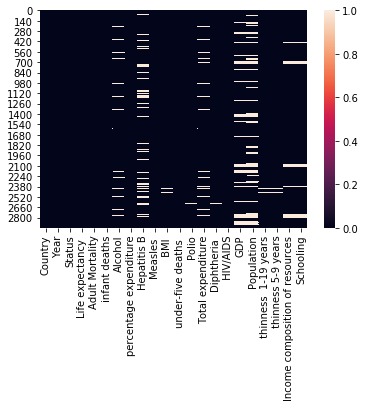

In [2]:
sns.heatmap(pd.isnull(df))

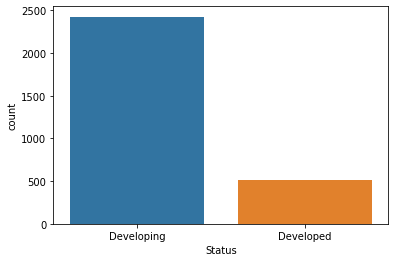

In [3]:
sns.countplot(x='Status',data=df)

In [4]:
df['Life expectancy ']=df['Life expectancy '].fillna(value=df['Life expectancy '].mean())
df['Adult Mortality']=df['Adult Mortality'].fillna(value=df['Adult Mortality'].mean())

In [5]:
def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return 4.0
        elif 2.5<sc<=5.0:
            return 1.5
        elif 5.0<sc<=7.5:
            return 2.5
        elif 7.5<sc<=10.0:
            return 3.0
        elif 10.0<sc<=15:
            return 4.0
        elif sc>15:
            return 10.0
    else:
        return al
    
df['Alcohol']=df[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)


In [6]:
df['Diphtheria ']=df['Diphtheria '].fillna(value=df['Diphtheria '].mean())
df['Alcohol']=df['Alcohol'].fillna(value=df['Alcohol'].mean())
df['Polio']=df['Polio'].fillna(value=df['Polio'].mean())

In [7]:
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=15:
            return 75.0
        elif 15<dip<=30:
            return 20.0
        elif 30<dip<=45:
            return 38.0
        elif 45<dip<=60:
            return 43.0
        elif 60<dip<=80:
            return 63.0
        elif dip>80:
            return 88.4
    else:
        return hep
    
df['Hepatitis B']=df[['Hepatitis B','Diphtheria ']].apply(impute_HepatatisB,axis=1)

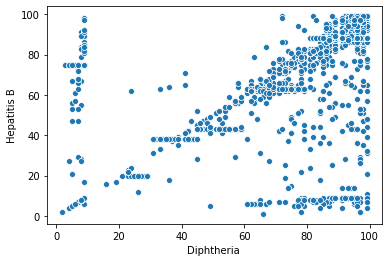

In [8]:
sns.scatterplot(x=df['Diphtheria '],y=df['Hepatitis B'])

####  dip<=15 => Hep B ~ 75.0
####   15<dip<=30 => Hep B ~20.0
####     30<dip<=45  => Hep B ~ 38.0
####          ...


In [9]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b

df[' BMI ']=df[[' BMI ','Life expectancy ']].apply(impute_BMI,axis=1)

In [10]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t
    
df['Total expenditure']=df[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1)

In [11]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 1100.0
        elif 1250<p<=2500:
            return 1800.0
        elif 2500<p<=3750:
            return 2900.0
        elif 3750<p<=7500:
            return 3500.0
        elif 7500<p<=8750:
            return 4500.0
        elif 8750<p<=10000:
            return 5000.0
        elif 10000<p<=11250:
            return 5700.0
        elif 11250<p<=12500:
            return 7000.0
        elif 12500<p<=15000:
            return 8000.0
        elif 15000<p<=17500:
            return 9000.0
        elif p>17500:
            return 8500.0
    else:
        return g

df['GDP']=df[['GDP','percentage expenditure']].apply(impute_GDP,axis=1)

In [12]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 0.19*((10)**9)
        elif 100<i<=250:
            return 0.18*((10)**9)
        elif 250<i<=350:
            return 0.02*((10)**9)
        elif 350<i<=900:
            return 0.1*((10)**9)
        elif 900<i<=1100:
            return 0.18*((10)**9)
        elif 1100<i<=1250:
            return 0.05*((10)**9)
        elif 1250<i<=1500:
            return 0.19*((10)**9)
        elif 1500<i<=1750:
            return 0.05*((10)**9)
        elif i>1750:
            return 0.1*((10)**9)
    else:
        return p
    
df['Population']=df[['Population','infant deaths']].apply(impute_population,axis=1)

In [13]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
df[' thinness  1-19 years']=df[[' thinness  1-19 years',' BMI ']].apply(impute_Thin_1,axis=1)

In [14]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
df[' thinness 5-9 years']=df[[' thinness 5-9 years',' BMI ']].apply(impute_Thin_1,axis=1)

In [15]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
df['Income composition of resources']=df[['Income composition of resources','Life expectancy ']].apply(impute_Income,axis=1)

In [16]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s
    
df['Schooling']=df[['Schooling','Life expectancy ']].apply(impute_schooling,axis=1)

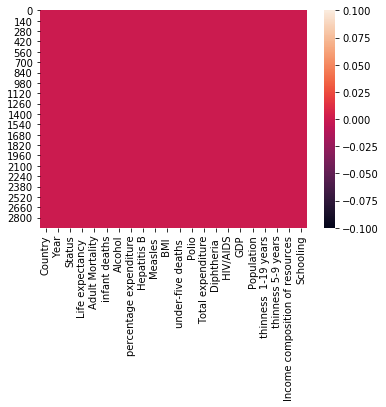

In [17]:
sns.heatmap(pd.isnull(df))

In [18]:
d1 = df

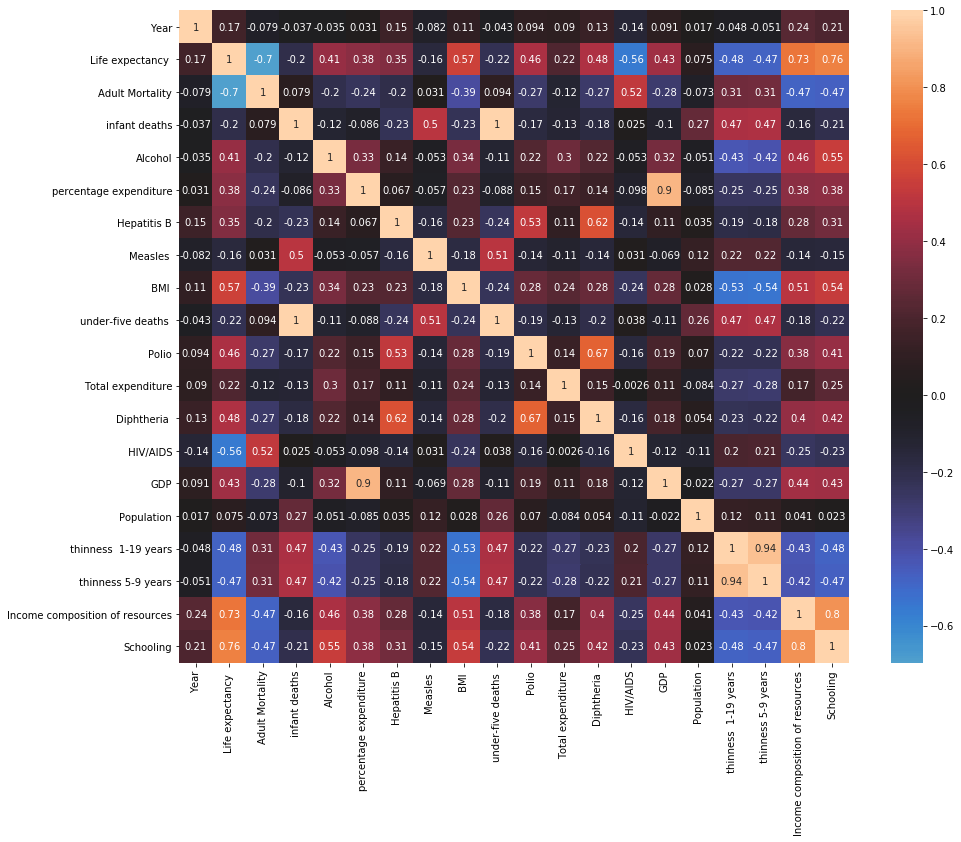

In [19]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(),center=0,annot=True)

- Kỳ vọng Tuổi thọ (biến mục tiêu) dường như có mối tương quan tương đối cao (tiêu cực hoặc tích cực) với:
    + Tỷ lệ tử vong ở người trưởng thành (tiêu cực): -0,7
    + HIV / AIDS (âm tính): -0,56
    + Thành phần Nguồn thu nhập (dương): 0,73
    + Đi học (tích cực): 0,76
- Tuổi thọ (biến mục tiêu) có tương quan cực kỳ thấp với dân số (gần như không có mối tương quan nào): 0,075
- Số ca tử vong ở trẻ sơ sinh và số ca tử vong dưới 5 tuổi có mối tương quan rất cao: 1
- Phần trăm chi tiêu và GDP có mối tương quan tương đối cao: 0,9
- Tỷ lệ vắc xin Viêm gan B tương quan thuận với tỷ lệ vắc xin Bại liệt (0,53) và Bạch hầu (0,62)
- Tỷ lệ vắc xin bại liệt và tỷ lệ vắc xin Bạch hầu có tương quan rất thuận (0,67)
- HIV / AIDS có tương quan nghịch với Thành phần Thu nhập của Nguồn lực (0,25)
- Tỷ lệ gầy của trẻ 5-9 tuổi và tỷ lệ gầy của trẻ 10-15 tuổi có mối tương quan rất cao (0,94)
- Thành phần Thu nhập của Nguồn lực và Trường học có mối tương quan rất cao (0,8)

## Question:

### - Tỷ lệ tử vong của Trẻ sơ sinh và Người lớn ảnh hưởng đến tuổi thọ như thế nào?
    
### - Một quốc gia có giá trị tuổi thọ thấp hơn (<65) có nên tăng chi tiêu cho chăm sóc sức khỏe để cải thiện tuổi thọ trung bình của mình không?
    
### - Các quốc gia đông dân có xu hướng có tuổi thọ thấp hơn không?
   
### - Chúng ta có nên tăng chỉ số phát triển con người ở các nước đã và đang phát triển để cải thiện tuổi thọ trung bình hay không?
    
### - So sánh các ca bệnh sởi giữa các nước đang phát triển và các nước đã phát triển. Từ đó hãy cho thấy ảnh hưởng của nó đối với tuổi thọ của các nước đó. 

## Tỷ lệ tử vong của Trẻ sơ sinh và Người lớn ảnh hưởng đến tuổi thọ như thế nào?

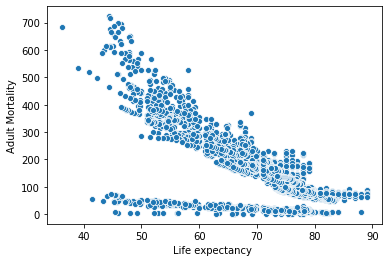

In [20]:
sns.scatterplot(x=df['Life expectancy '],y=df['Adult Mortality'])

#### + Mức độ tương quan giữa tỉ lệ tử vong của người trưởng thành với tuổi thọ = -0.7

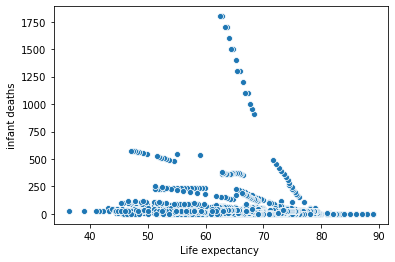

In [21]:
sns.scatterplot(x=df['Life expectancy '],y=df['infant deaths'])

#### +  Mức độ tương quan giữa tỉ lệ tử vong của trẻ sơ sinh với tuổi thọ = -0.2

Nhận xét: 
- Tỉ lệ tử vong của người trưởng thành ảnh hưởng nhiều hơn so với tỉ lệ tử vong của trẻ sơ sinh
    +  Mức độ tương quan giữa tỉ lệ tử vong của trẻ sơ sinh với tuổi thọ = -0.2
    +  Mức độ tương quan giữa tỉ lệ tử vong của người trưởng thành với tuổi thọ = -0.7

## Một quốc gia có giá trị tuổi thọ thấp hơn (<65) có nên tăng chi tiêu cho chăm sóc sức khỏe để cải thiện tuổi thọ trung bình của mình không?

In [22]:
df=d1
df=df[df['Year']==2014]
df=df[df['Life expectancy ']<=65]

Text(0, 0.5, 'Life expectancy')

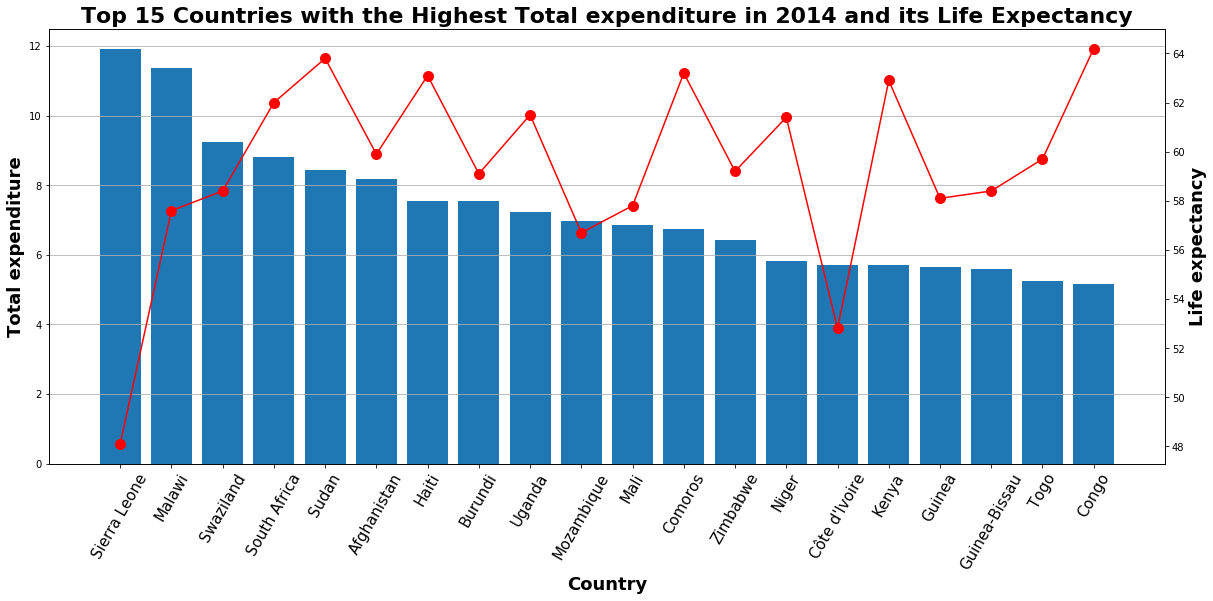

In [23]:

df1=df.sort_values('Total expenditure',ascending=False).head(20)
fig=plt.figure(figsize=(20,8))
ax1 =plt.subplot(1,1,1)
plt.title("Top 15 Countries with the Highest Total expenditure in 2014 and its Life Expectancy",fontsize=22,fontweight="bold")
ax1.bar(df1['Country'],df1['Total expenditure'])
ax1.yaxis.grid(linestyle='-')
plt.ylabel("Total expenditure", fontsize= 18, fontweight="bold")
plt.xlabel("Country", fontsize=18, fontweight="bold")
plt.xticks(rotation=60, fontsize=15 )
ax2=ax1.twinx()
ax2.plot(df1['Country'],df1['Life expectancy '],color='red',marker='.',markersize=20)
plt.ylabel("Life expectancy", fontsize= 18, fontweight="bold")

Text(0, 0.5, 'Life expectancy')

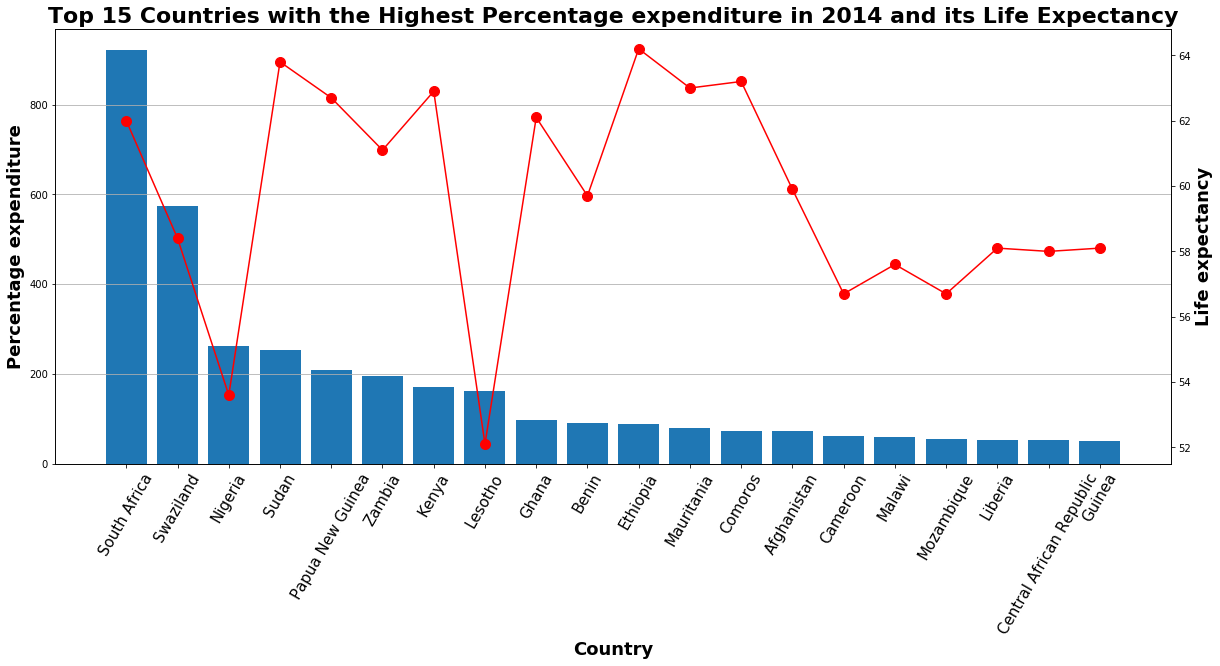

In [24]:
df=d1
df=df[df['Year']==2014]
df=df[df['Life expectancy ']<=65]
df1=df.sort_values('percentage expenditure',ascending=False).head(20)
fig=plt.figure(figsize=(20,8))
ax1 =plt.subplot(1,1,1)
plt.title("Top 15 Countries with the Highest Percentage expenditure in 2014 and its Life Expectancy",fontsize=22,fontweight="bold")
ax1.bar(df1['Country'],df1['percentage expenditure'])
ax1.yaxis.grid(linestyle='-')
plt.ylabel("Percentage expenditure", fontsize= 18, fontweight="bold")
plt.xlabel("Country", fontsize=18, fontweight="bold")
plt.xticks(rotation=60, fontsize=15 )
ax2=ax1.twinx()
ax2.plot(df1['Country'],df1['Life expectancy '],color='red',marker='.',markersize=20)
plt.ylabel("Life expectancy", fontsize= 18, fontweight="bold")#percentage expenditure Total expenditure

- Nhận xét:
    + Ảnh hưởng của Total expenditure đến Life expectancy không đáng kể 
    + Percentage expenditure có ảnh hưởng đến Life expectancy nhưng không nhiều
- Suy ra: Không nhất thiết phải tăng chi tiêu cho chăm sóc sức khỏe để cả thiện tuổi thọ trung bình

## Các quốc gia đông dân có xu hướng có tuổi thọ thấp hơn không?

In [25]:
df = d1
df=df[df['Year']==2015]

Text(0, 0.5, 'Life expectancy')

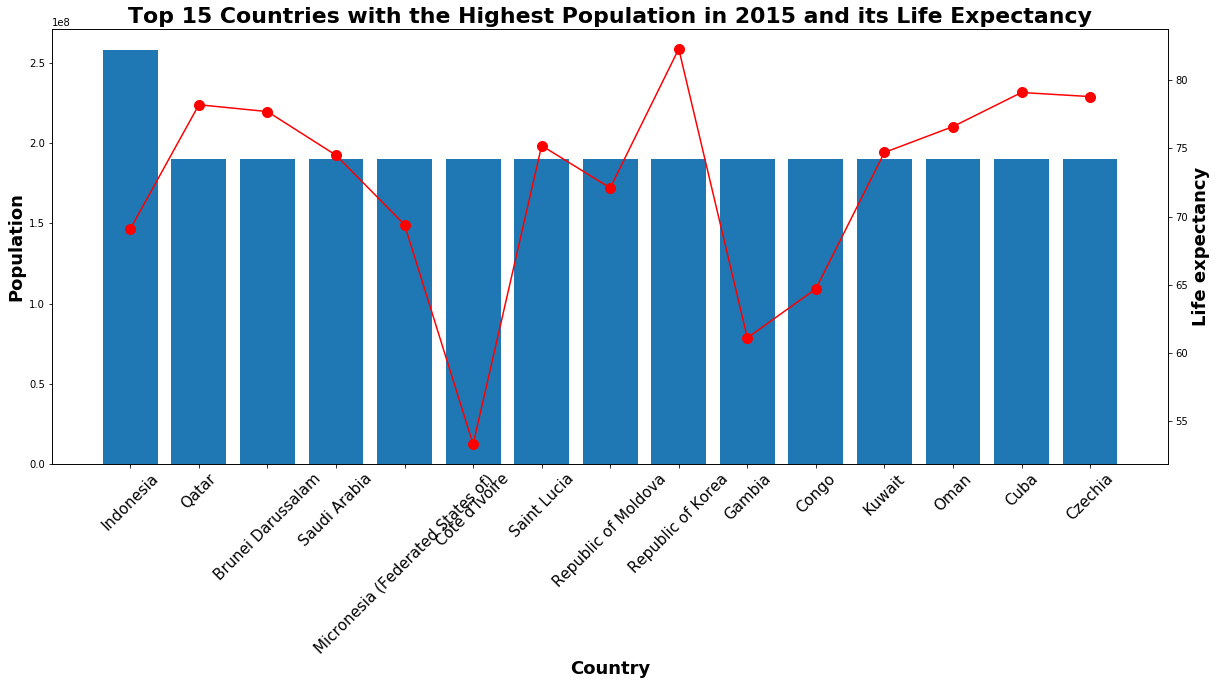

In [26]:
df1=df.sort_values('Population',ascending=False).head(15)
fig=plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,1,1)
plt.title("Top 15 Countries with the Highest Population in 2015 and its Life Expectancy",fontsize=22,fontweight="bold")
ax1.bar(df1['Country'],df1['Population'])
plt.ylabel("Population", fontsize= 18, fontweight="bold")
plt.xlabel("Country", fontsize=18, fontweight="bold")
plt.xticks(rotation=45, fontsize=15 )
ax2=ax1.twinx()
ax2.plot(df1['Country'],df1['Life expectancy '],color='red',marker='.',markersize=20)
plt.ylabel("Life expectancy", fontsize= 18, fontweight="bold")

In [27]:
df = d1
df=df[df['Year']==2015]

Text(0, 0.5, 'Life expectancy')

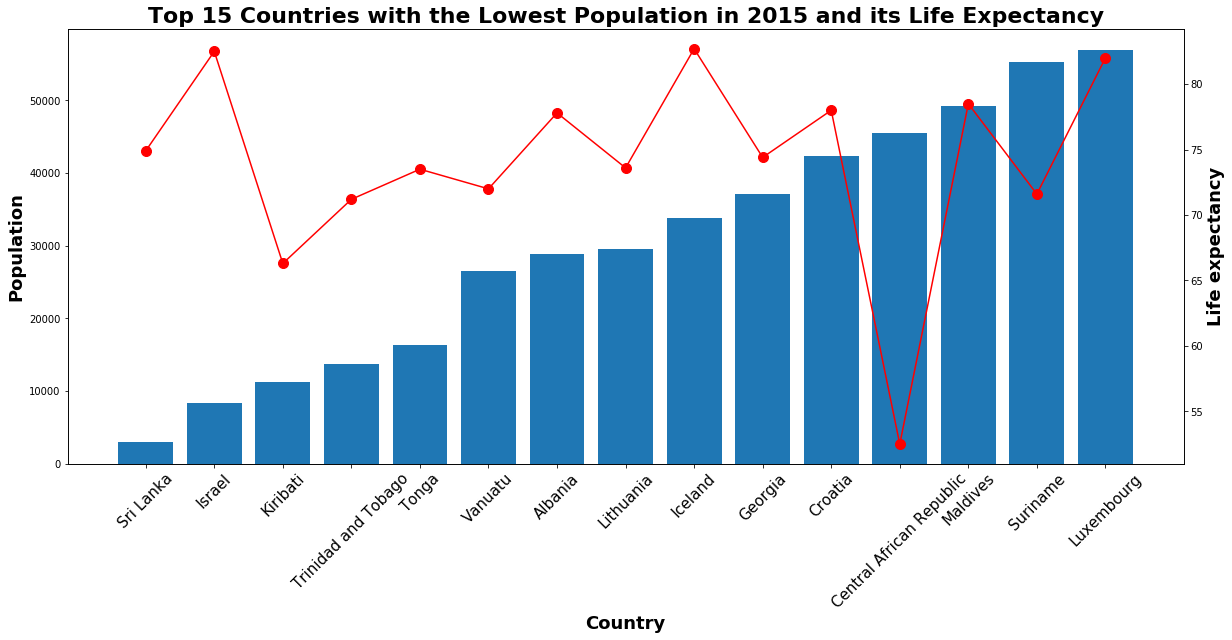

In [28]:
df1=df.sort_values('Population').head(15)
fig=plt.figure(figsize=(20,8))
ax1 =plt.subplot(1,1,1)
plt.title("Top 15 Countries with the Lowest Population in 2015 and its Life Expectancy",fontsize=22,fontweight="bold")
ax1.bar(df1['Country'],df1['Population'])
plt.ylabel("Population", fontsize= 18, fontweight="bold")
plt.xlabel("Country", fontsize=18, fontweight="bold")
plt.xticks(rotation=45, fontsize=15 )
ax2=ax1.twinx()
ax2.plot(df1['Country'],df1['Life expectancy '],color='red',marker='.',markersize=20)
plt.ylabel("Life expectancy", fontsize= 18, fontweight="bold")

- Nhận xét: Qua biểu đồ thể hiện sự tương quan phía trên thì ta có thể thấy dân số không ảnh hưởng đến tuổi thọ. Nên các quốc gia đông dân không có xu hướng có tuổi thọ thấp

## Chúng ta có nên tăng chỉ số phát triển con người ở các nước đã và đang phát triển để cải thiện tuổi thọ trung bình hay không?

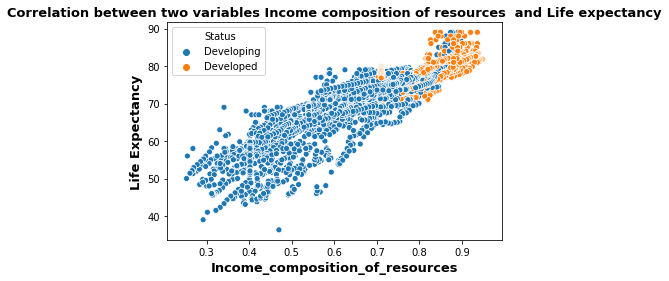

In [29]:
Data=d1
Data = Data.drop(Data[Data['Income composition of resources']==0].index)
sns.scatterplot(x= Data['Income composition of resources'], y=  Data['Life expectancy '], hue= Data.Status)
plt.title("Correlation between two variables Income composition of resources  and Life expectancy",fontsize=13,fontweight="bold")
plt.ylabel("Life Expectancy", fontsize= 13, fontweight="bold")
plt.xlabel("Income_composition_of_resources", fontsize=13, fontweight="bold")
plt.show()

- Nhận xét: Chúng ta nên tăng chỉ số phát triển con người lên để cải thiện tuổi thọ trung bình.

## So sánh các ca bệnh sởi giữa các nước đang phát triển và các nước đã phát triển. Từ đó hãy cho thấy ảnh hưởng của nó đối với tuổi thọ của các nước đó.

In [30]:
import plotly.graph_objects as go
df=d1
life_year = df.groupby(by = ['Year', 'Status']).mean().reset_index()

Developed = life_year.loc[life_year['Status'] == 'Developed',:]
Developing = life_year.loc[life_year['Status'] == 'Developing',:]

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=Developing['Year'], y=Developing['Measles '], mode='lines',name='Developing', marker_color='#f075c2'))
fig1.add_trace(go.Scatter(x=Developed['Year'], y=Developed['Measles '],
                mode='lines',
                name='Developed',
                marker_color='#28d2c2'))

fig1.update_layout(
height=500,
xaxis_title="Years",
yaxis_title='Measles',
title_text='Average Measles of Developing and Developed countries over the years')
fig1.show()

In [31]:
df=d1
life_year = df.groupby(by = ['Year', 'Status']).mean().reset_index()

Developed = life_year.loc[life_year['Status'] == 'Developed',:]
Developing = life_year.loc[life_year['Status'] == 'Developing',:]

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=Developing['Year'], y=Developing['Life expectancy '], mode='lines',name='Developing', marker_color='#f075c2'))
fig1.add_trace(go.Scatter(x=Developed['Year'], y=Developed['Life expectancy '],
                mode='lines',
                name='Developed',
                marker_color='#28d2c2'))

fig1.update_layout(
height=500,
xaxis_title="Years",
yaxis_title='Life expectancy in age',
title_text='Average Life expectancy of Developing and Developed countries over the years')
fig1.show()

- Nhận xét:
    + Qua 2 biểu đồ trên ta có thể thấy số ca bệnh sởi của các nước đang phát triển cao hơn nhiều so với các nước phát triển và tuổi thọ của các nước đang phát triển thì lại thấp hơn so với các nước phát triển
    + Từ năm 2000 - 2014 các ca bệnh sởi có xu hướng giảm thì tuổi thọ lại có xu hướng tăng lên 
- Từ đó có thể thấy số ca bệnh sởi có ảnh hưởng đối với tuổi thọ, và nó ảnh hưởng tiêu cực đối với tuổi thọ

## Kết luận

### - Tuổi thọ bị chịu ảnh hưởng khá lớn của các yếu tố bên ngoài.
### + Về mặc tích cực : Nó giúp cải thiện tuổi thọ của các quốc gia trên thế giới, giúp tăng trưởng nên kinh tế do có nguồn lao động dồi dào. Giúp các nước đi lên trong nền thời đại 4.0 này.
### + Về mặt tiêu cực : Nó sẽ khiến cho trái đất bị bùng nổ dân số, già hoá dân số khiến thời gian sống sau nghỉ hưu tăng lên, làm gia tăng áp lực lên hệ thống y tế và hệ thống trợ cấp lương hưu.

#  Thank You For Watching